**Hoja de Trabajo #6** <br>
***Regresión logística*** <br>
Diego Ruiz 18761, Jose Jorge Perez 18364

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, learning_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
import seaborn as sb
import random
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import statsmodels.api as sm
import cProfile

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

1. Cree una variable dicotómica por cada una de las categorías de la variable respuesta categórica que creó en hojas anteriores. Debería tener 3 variables dicotómicas (valores 0 y 1) una que diga si la vivienda es cara o no, media o no, económica o no.

In [3]:
datos = pd.read_csv("train.csv", encoding="latin1")
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

numericas = numericas.dropna()

terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]

numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])
print(numericas)

      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF

In [6]:
dummies = pd.get_dummies(numericas['Clase'])
datos = pd.concat([numericas,dummies], axis=1)
dummies.head()

,Económicas,Intermedias,Caras
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [7]:
economica = datos.pop("Económicas") 
intermedias = datos.pop("Intermedias")
caras = datos.pop("Caras")
datos.pop("Clase")

0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: Clase, Length: 1195, dtype: category
Categories (3, object): ['Económicas' < 'Intermedias' < 'Caras']

2. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores. <br>
3. Elabore un modelo de regresión logística para conocer si una vivienda es cara o no, utilizando el conjunto de entrenamiento y explique los resultados a los que llega. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. Use validación cruzada.

In [23]:
X = datos
y = caras
random.seed(42)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Confussion Matrix
[[228   4]
 [  1 126]] 

Accuracy: 0.9860724233983287
Precission: 0.986293056422358
Recall:  0.9860724233983287
F1 Score:  0.9861083952615605


In [24]:
scores = cross_val_score(logReg, X, y, cv = 5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.9958159 0.9958159 0.9832636 0.9958159 0.9916318]
Average CV Score:  0.992468619246862


4. Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan al modelo, por su valor de significación. Haga un análisis de correlación de las variables del modelo y especifique si el modelo se adapta bien a los datos.

Text(0.5, 1.0, 'Correlación de variables del modelo')

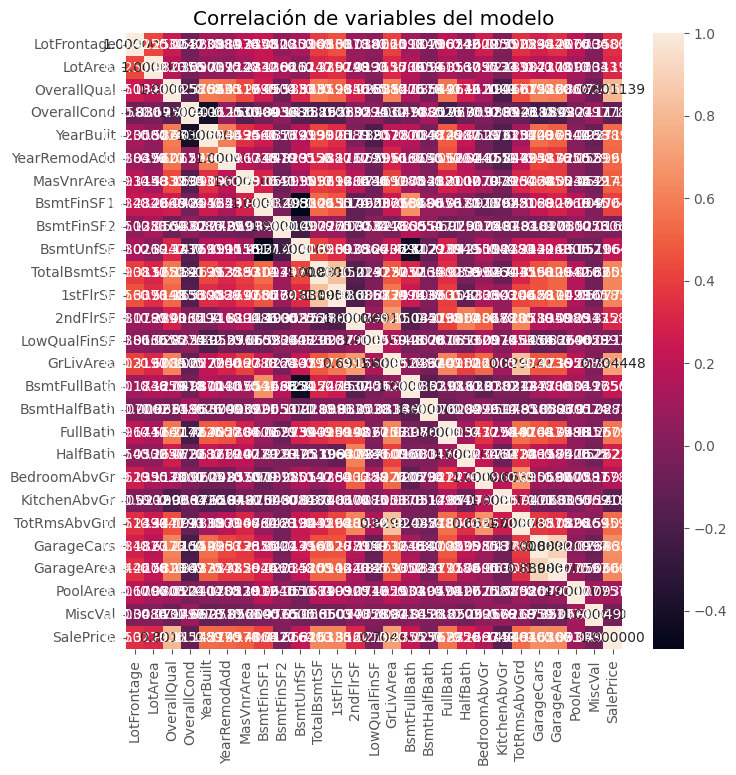

In [25]:
plt.subplots(figsize = (8,8))
sb.heatmap(numericas.corr(numeric_only = True),annot=True,fmt="f").set_title("Correlación de variables del modelo")

El modelo se ajusta bien al set de datos.

5. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar.

In [29]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3)
logRegC = LogisticRegression(solver='liblinear')
logRegC.fit(X_train,y_train)
y_pred = logRegC.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Confussion Matrix
[[229   3]
 [  4 123]] 

Accuracy: 0.9805013927576601
Precission: 0.9804828909698181
Recall:  0.9805013927576601
F1 Score:  0.9804838242050851


Como se esperaba, el algoritmo es muy bueno para clasificar, equivocandose en muy pocas ocsiones y obteniendo puntajes en metricas de 0.98 en todos los ambitos.

6. Explique si hay sobreajuste (overfitting) o no (recuerde usar para esto los errores del conjunto de prueba y de entrenamiento). Muestre las curvas de aprendizaje usando los errores de los conjuntos de entrenamiento y prueba.

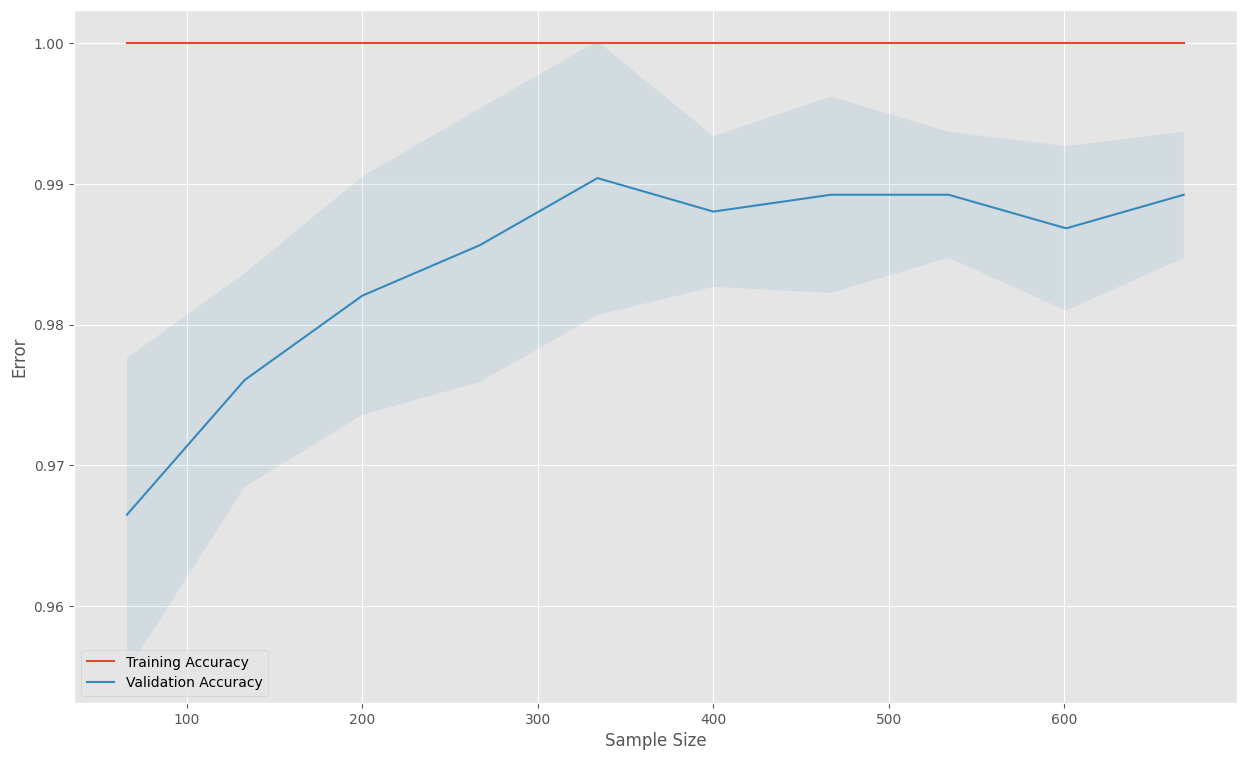

In [42]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logReg, 
    X=X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5,
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.legend()
plt.show()

No se puede encontrar que exista un overfitting en realidad, ya que el algoritmo tiene un buen rendimiento con el set de prueba, esto se conoce ya que no baja de 0.96 su rendimiento. Es normal que se equivoque en algunas cosas, pero se puede asegurar que esto no se debe a un sobreajuste.

7. Haga otros dos modelos cambiando las variables predictoras de acuerdo con la significación de los coeficientes en el primer modelo. Explique por qué seleccionó las variables que uso para cada modelo.

In [47]:
# Stepwise regression
def forward_stepwise(X, y, initial_list=[], threshold_in=0.01, verbose=True):
    included = list(initial_list)
    excluded = [col for col in X.columns if col not in included]
    while True:
        changed = False
        excluded_dict = {}
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            p_value = model.pvalues[new_column]
            excluded_dict[new_column] = p_value
        best_column, best_pvalue = min(excluded_dict.items(), key=lambda x: x[1])
        if best_pvalue < threshold_in:
            included.append(best_column)
            excluded.remove(best_column)
            if verbose:
                print("Add {:30} with p-value {:.6}".format(best_column, best_pvalue))
            changed = True
        if not changed:
            break
    return included

selected_columns = forward_stepwise(X, y)

Add SalePrice                      with p-value 1.06628e-231
Add OverallQual                    with p-value 2.59376e-12
Add YearRemodAdd                   with p-value 7.30075e-07
Add OverallCond                    with p-value 1.41202e-07
Add FullBath                       with p-value 0.00174004
Add MasVnrArea                     with p-value 0.00257718
Add PoolArea                       with p-value 0.00571085
Add GarageArea                     with p-value 0.00650622
Add GarageCars                     with p-value 0.00623016


La forma en que se seleccionaron las columnas anteriores es verificando que su valor P sea certero y poco probable de
ser random, lo cual garantiza mejores predicciones.

In [50]:
def DTC(X_train, y_train, X_test, y_test):
    arbol = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
    y_pred = arbol.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confussion Matrix")
    print(cm,"\n")
    print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
    print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
    print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

DTC(X_train, y_train, X_test, y_test)

Confussion Matrix
[[232   0]
 [  0 127]] 

Accuracy: 1.0
Precission: 1.0
Recall:  1.0
F1 Score:  1.0


In [52]:
def RFC(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=100, max_depth=None).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confussion Matrix")
    print(cm,"\n")
    print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
    print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
    print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

RFC(X_train, y_train, X_test, y_test)

Confussion Matrix
[[232   0]
 [  2 125]] 

Accuracy: 0.9944289693593314
Precission: 0.9944765850058328
Recall:  0.9944289693593314
F1 Score:  0.9944188170962591


8. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión. Tenga en
cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la
importancia que tienen los errores, el tiempo y la memoria consumida. Para esto último
puede usar “profvis” si trabaja con R y “cProfile” en Python.

In [54]:
cProfile.run('DTC(X_train, y_train, X_test, y_test)')

Confussion Matrix
[[232   0]
 [  0 127]] 

Accuracy: 1.0
Precission: 1.0
Recall:  1.0
F1 Score:  1.0
         14939 function calls (14733 primitive calls) in 0.017 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.016    0.016 2279557706.py:1(DTC)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(all)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
       16    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argmax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_1d)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(average)
        9    0.000    0.000    0.000    0.000 <__array

In [55]:
cProfile.run('RFC(X_train, y_train, X_test, y_test)')

Confussion Matrix
[[232   0]
 [  3 124]] 

Accuracy: 0.9916434540389972
Precission: 0.9917501333491376
Recall:  0.9916434540389972
F1 Score:  0.9916203556753523
         285137 function calls (282216 primitive calls) in 0.291 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.291    0.291 2711063242.py:1(RFC)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(all)
      101    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(amax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
      116    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argmax)
      102    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(atleast_1d)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(a

9. Determine cual de todos los modelos es mejor, puede usar AIC y BIC para esto, además de
los parámetros de la matriz de confusión y los del profiler.

In [63]:
model1 = sm.OLS.from_formula(formula=DTC, data= X)
print(model1.aic)


PatsyError: model is missing required outcome variables

10. Haga un modelo de árbol de decisión, uno de Random Forest y uno de Naive Bayes usando
la misma variable respuesta y los mismos predictores que el mejor de los modelos de
Regresión Logística.

11. Compare la eficiencia de los 3 modelos que creó en el punto anterior y el mejor de los de
regresión logística ¿Cuál se demoró más en procesar?¿Cuál se equivocó más? ¿Cuál se
equivocó menos? ¿Por qué?